**Importing necessary libraries**

In [47]:
import pandas as pd
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score

**Loading the dataset**

In [48]:
df=pd.read_csv(r"D:\College\music\spotify_tracks.csv")

In [49]:
df = df.drop_duplicates(subset='track_name', keep='first')
df.reset_index(drop=True, inplace=True)
df.to_csv("spotify_cleaned.csv", index=False)

In [50]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [51]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [52]:
df.shape


(73609, 21)

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73609 entries, 0 to 73608
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        73609 non-null  int64  
 1   track_id          73609 non-null  object 
 2   artists           73608 non-null  object 
 3   album_name        73608 non-null  object 
 4   track_name        73608 non-null  object 
 5   popularity        73609 non-null  int64  
 6   duration_ms       73609 non-null  int64  
 7   explicit          73609 non-null  bool   
 8   danceability      73609 non-null  float64
 9   energy            73609 non-null  float64
 10  key               73609 non-null  int64  
 11  loudness          73609 non-null  float64
 12  mode              73609 non-null  int64  
 13  speechiness       73609 non-null  float64
 14  acousticness      73609 non-null  float64
 15  instrumentalness  73609 non-null  float64
 16  liveness          73609 non-null  float6

In [54]:
df.shape


(73609, 21)

In [55]:
df.dropna()

Unnamed: 0                track_id                 artists  \
0               0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1               1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2               2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3               3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4               4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...           ...                     ...                     ...   
73604      113994  4WbOUe6T0sozC7z5ZJgiAA          Lucas Cervetti   
73605      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
73606      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
73607      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
73608      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                              album_name  \
0                                                 Comedy   
1                                       Ghost (Acoustic)   
2                                         To Begin Again   
3      Crazy Rich Asians (Original Motion Picture Sou...   
4                                                Hold On   
...                                                  ...   
73604                       Frecuencias Álmicas en 432hz   
73605  #mindfulness - Soft Rain for Mindful Meditatio...   
73606  #mindfulness - Soft Rain for Mindful Meditatio...   
73607                                            Best Of   
73608                                     Miss Perfumado   

                       track_name  popularity  duration_ms  explicit  \
0                          Comedy          73       230666     False   
1                Ghost - Acoustic          55       149610     False   
2                  To Begin Again          57       210826     False   
3      Can't Help Falling In Love          71       201933     False   
4                         Hold On          82       198853     False   
...                           ...         ...          ...       ...   
73604    Frecuencia Álmica, Pt. 4          22       305454     False   
73605         Sleep My Little Boy          21       384999     False   
73606            Water Into Light          22       385000     False   
73607              Miss Perfumado          22       271466     False   
73608                   Barbincor          22       241826     False   

       danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0             0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1             0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2             0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3             0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4             0.618  0.4430  ...    -9.681     1       0.0526        0.4690   
...             ...     ...  ...       ...   ...          ...           ...   
73604         0.331  0.1710  ...   -15.668     1       0.0350        0.9200   
73605         0.172  0.2350  ...   -16.393     1       0.0422        0.6400   
73606         0.174  0.1170  ...   -18.318     0       0.0401        0.9940   
73607         0.629  0.3290  ...   -10.895     0       0.0420        0.8670   
73608         0.526  0.4870  ...   -10.204     0       0.0725        0.6810   

       instrumentalness  liveness  valence    tempo  time_signature  \
0              0.000001    0.3580   0.7150   87.917               4   
1              0.000006    0.1010   0.2670   77.489               4   
2              0.000000    0.1170   0.1200   76.332               4   
3              0.000071    0.1320   0.1430  181.740               3   
4              0.000000    0.0829   0.1670  119.949               4   
...                 ...       ...      ...      ...             ...   
73604          0.022900    0.0679   0.3270  132.147               3   
73605          0.928000    0.0863   0.0339  125.995               5   
7360

In [56]:
df.nunique()

Unnamed: 0          73609
track_id            73609
artists             29220
album_name          42726
track_name          73608
popularity            101
duration_ms         46833
explicit                2
danceability         1160
energy               2042
key                    12
loudness            18797
mode                    2
speechiness          1485
acousticness         5016
instrumentalness     5312
liveness             1717
valence              1782
tempo               42007
time_signature          5
track_genre           113
dtype: int64

In [57]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [58]:
df=pd.get_dummies(data=df , columns=['explicit'] , drop_first=True)
df.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  danceability  energy  \
0                      Comedy          73       230666         0.676  0.4610   
1            Ghost - Acoustic          55       149610         0.420  0.1660   
2              To Begin Again          57       210826         0.438  0.3590   
3  Can't Help Falling In Love          71       201933         0.266  0.0596   
4                     Hold On          82       198853         0.618  0.4430   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    1    -6.746     0       0.1430        0.0322          0.000001    0.3580   
1    1   -17.235     1       0.0763        0.9240          0.000006    0.1010   
2    0    -9.734     1       0.0557        0.2100          0.000000    0.1170   
3    0   -18.515     1       0.0363        0.9050          0.000071    0.1320   
4    2    -9.681     1       0.0526        0.4690          0.000000    0.0829   

   valence    tempo  time_signature track_genre  explicit_True  
0    0.715   87.917               4    acoustic          False  
1    0.267   77.489               4    acoustic          False  
2    0.120   76.332               4    acoustic          False  
3    0.143  181.740               3    acoustic          False  
4    0.167  119.949               4    acoustic          False

<Figure size 1000x500 with 0 Axes>

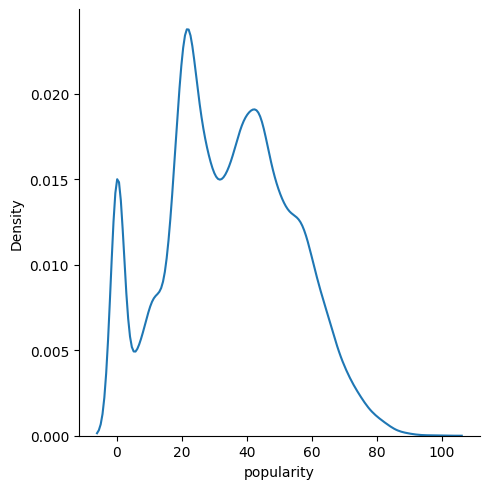

In [59]:
plt.figure(figsize=(10,5))

sns.displot(data=df  ,x='popularity', kind='kde')

In [60]:
selected = ["duration_ms", "popularity",  "danceability", "energy", "loudness" , "speechiness" , "acousticness" , "instrumentalness" , "liveness" , "valence" , "tempo" , "explicit_True"]
sns.pairplot(df[selected] , diag_kind="kde")

<Axes: xlabel='explicit_True', ylabel='count'>

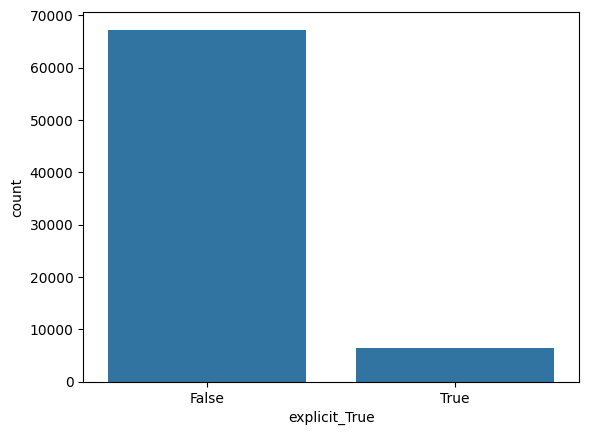

In [61]:
sns.countplot(data=df,x='explicit_True')

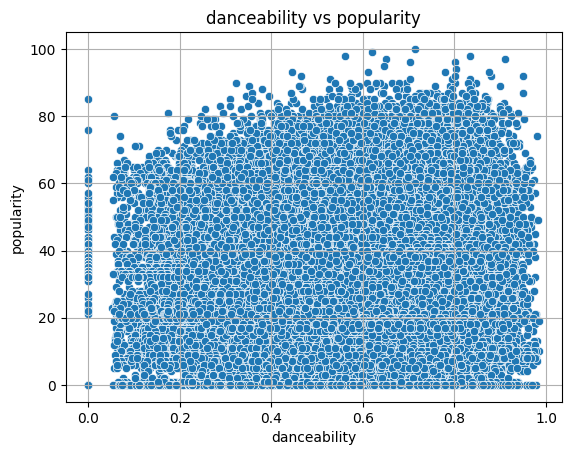

In [62]:
sns.scatterplot(x='danceability' , y='popularity' , data=df)
plt.title('danceability vs popularity')
plt.grid()
plt.show()

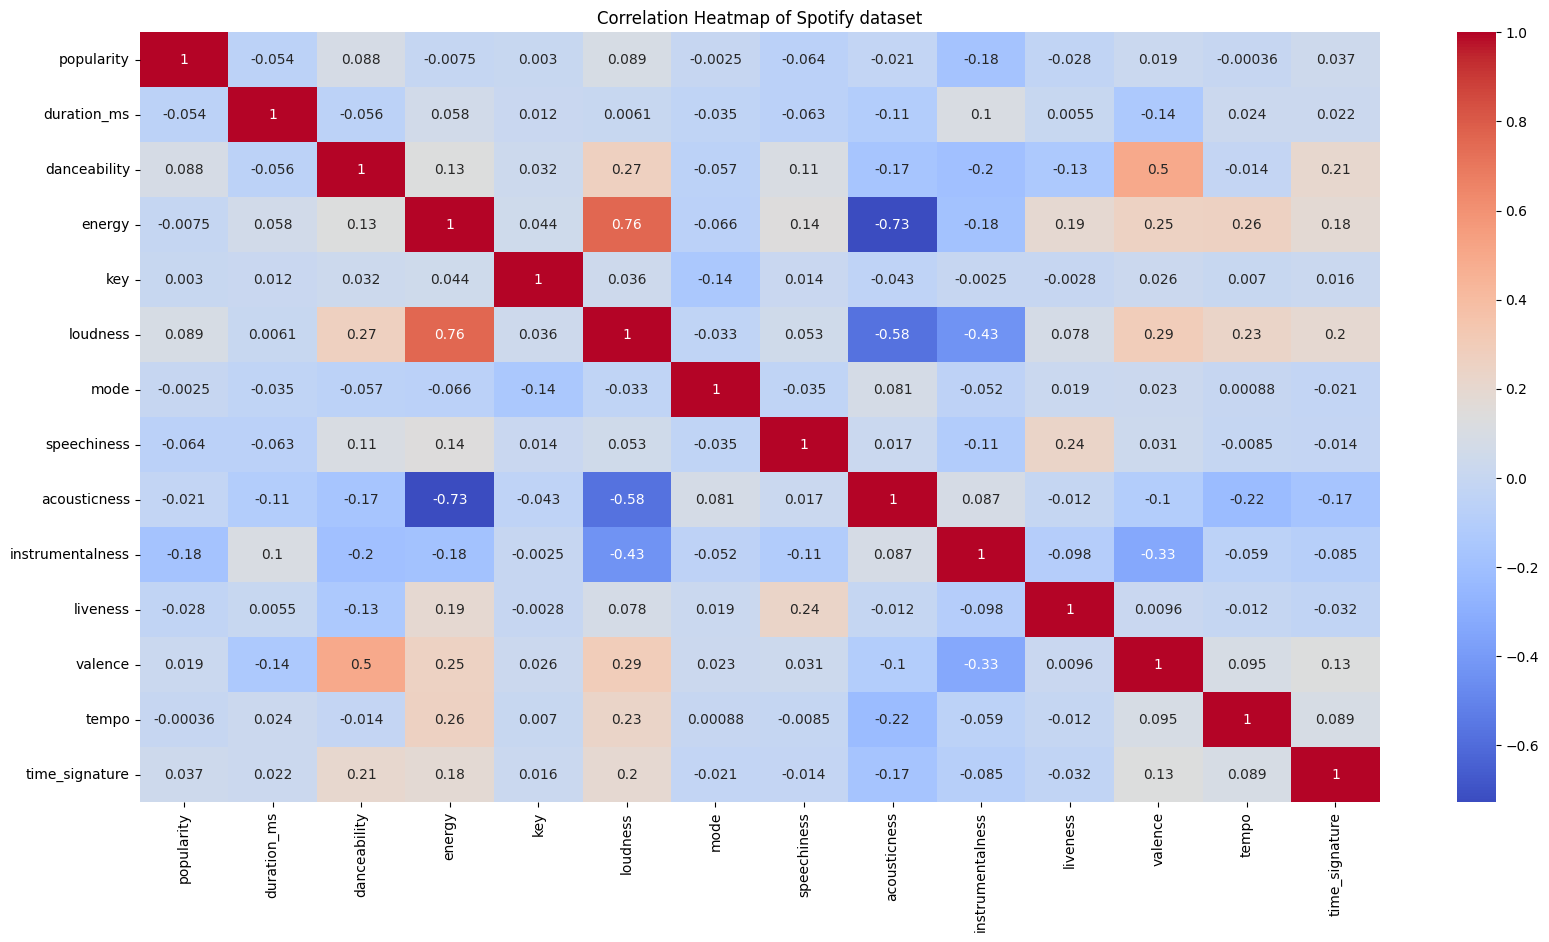

In [63]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Spotify dataset")
plt.show()

Text(0.5, 1.0, 'TOP 20 ALBUMS')

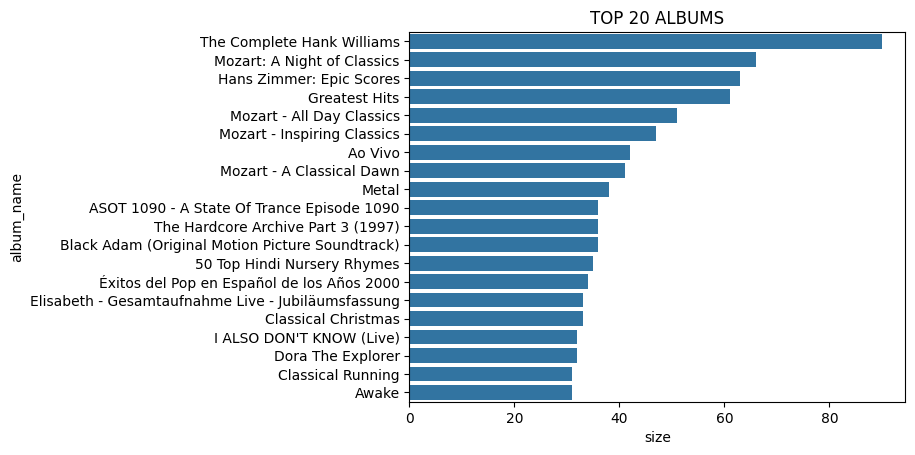

In [64]:
top_20_albums = df.groupby(by=['album_name'], as_index=False).size().sort_values('size', ascending=False).head(20)
sns.barplot(data=top_20_albums,y= 'album_name',x='size',color=sns.color_palette()[0])
plt.title('TOP 20 ALBUMS')

Text(0.5, 1.0, 'Danceability Boxplot')

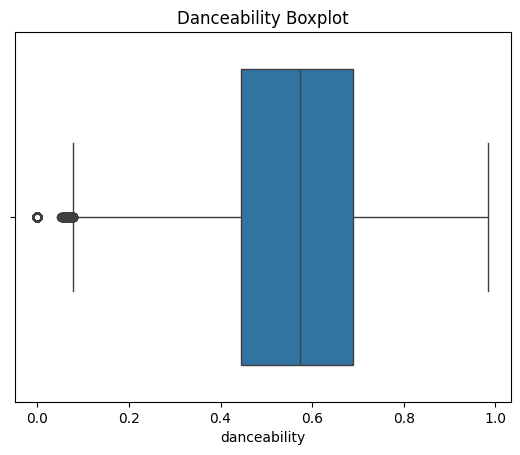

In [65]:
sns.boxplot(data=df,x='danceability')
plt.title('Danceability Boxplot')

Text(0.5, 1.0, 'Danceability Boxplot')

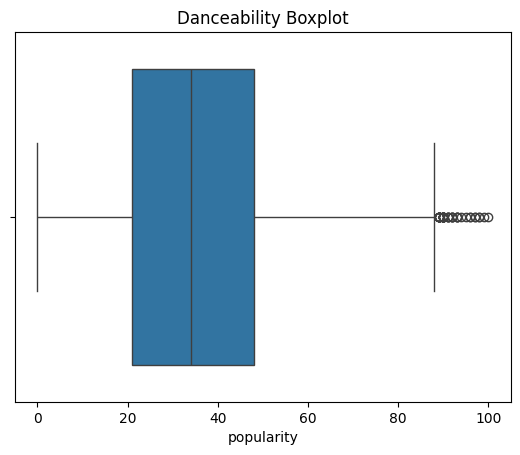

In [66]:
sns.boxplot(data=df,x='popularity')
plt.title('Danceability Boxplot')

Text(0.5, 1.0, 'Danceability Boxplot')

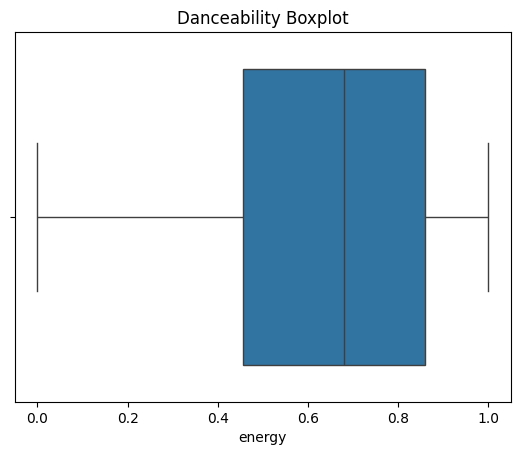

In [67]:
sns.boxplot(data=df,x='energy')
plt.title('Danceability Boxplot')

Text(0.5, 1.0, 'Danceability Boxplot')

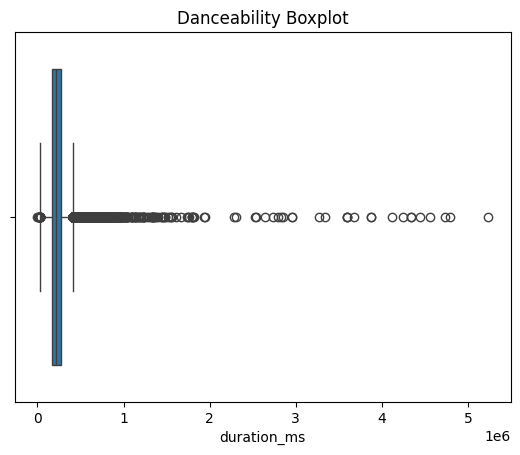

In [68]:
sns.boxplot(data=df,x='duration_ms')
plt.title('Danceability Boxplot')

**Spliting data and model training**

In [74]:
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]
X = df[audio_features]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
knn = NearestNeighbors(n_neighbors=21, algorithm='auto', metric='cosine')
knn.fit(x_scaled)

NearestNeighbors(metric='cosine', n_neighbors=21)

**Getting output for the model**


In [75]:
song_name=input("Enter song name")
song_index = df[df['track_name'].str.lower() == song_name.lower()].index[0]
song_vector = x_scaled[song_index].reshape(1, -1)
distances, indices = knn.kneighbors(song_vector)
print(f"\n🎵 Songs similar to '{song_name}':\n")
for idx in indices[0][1:]:  
    print(f"• {df.iloc[idx]['track_name']} by {df.iloc[idx]['artists']} (Genre: {df.iloc[idx]['track_genre']})")

Enter song name last christmas



🎵 Songs similar to 'last christmas':

• carta pra ninguém by João Klein (Genre: mpb)
• Duckie Duckie by Mister Rhythm (Genre: kids)
• Broken Bottle, Broken Heart by The Country Side Of Harmonica Sam (Genre: guitar)
• numb the pain by XXXTENTACION (Genre: emo)
• Oru Sandhana Kaattukkulle by Ilaiyaraaja;S. Janaki (Genre: k-pop)
• Volverás - Remastered by La Sonora Matancera (Genre: salsa)
• Just A Heart by James Hand (Genre: honky-tonk)
• Inthandham (From "Sita Ramam (Telugu)") by Vishal Chandrashekhar;S.P. Charan (Genre: pop)
• Лодочка (Плыла-качалась лодочка) by Группа "Загадка" (Genre: romance)
• Single Girl by Sandy Posey (Genre: rock-n-roll)
• Fruto Especial / Só Sei te amar by Bruno & Marrone (Genre: sertanejo)
• Young Lovers - Nashville Mix by Paul & Paula (Genre: rock-n-roll)
• always, i'll care by Jeremy Zucker (Genre: electro)
• The Lonely Goatherd by Julie Andrews;Charmian Carr;Heather Menzies;Nicholas Hammond;Duane Chase;Angela Cartwright;Debbie Turner;Kym Karath (Genre: sho